<a href="https://colab.research.google.com/github/brilli44/PCVK_ganjil_24/blob/main/Week_7_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

## c.Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.

Hasil konvolusi dengan sharpen filter:


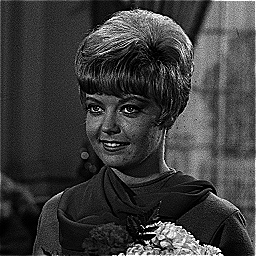

In [8]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def convolve2d(image, kernel, stride=1, pad=0):
    # Menambahkan padding pada citra
    image_padded = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)

    # Mendapatkan dimensi citra dan kernel
    image_height, image_width = image_padded.shape
    kernel_height, kernel_width = kernel.shape

    # Menghitung dimensi output
    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1
    output = np.zeros((output_height, output_width))

    # Melakukan operasi konvolusi
    for y in range(0, output_height):
        for x in range(0, output_width):
            output[y, x] = np.sum(
                image_padded[y*stride:y*stride+kernel_height, x*stride:x*stride+kernel_width] * kernel
            )

    return output

# Tambahan kode untuk load citra dan mengubahnya ke grayscale
if __name__ == "__main__":
    # Load citra (ganti dengan path citramu)
    image_path = '/content/drive/MyDrive/PCVK/female.tiff'  # Ganti dengan path citra yang sesuai
    image = cv2.imread(image_path)

    # Ubah citra ke grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Kernel sharpen yang diberikan
    kernel_sharpen = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])

    # Mengatur stride dan padding
    stride = 1
    pad = 1

    # Melakukan konvolusi dengan kernel sharpen
    output_sharpen = convolve2d(gray_image, kernel_sharpen, stride, pad)

    # Menampilkan hasil konvolusi
    print("Hasil konvolusi dengan sharpen filter:")
    cv2_imshow(output_sharpen)


Hasil Filter Emboss:


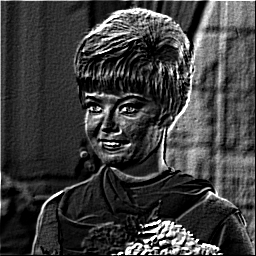

Hasil Left Sobel Edge Detection:


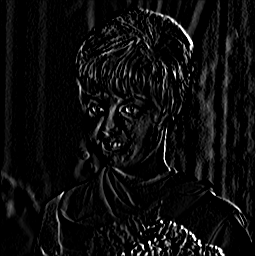

Hasil Canny Edge Detection


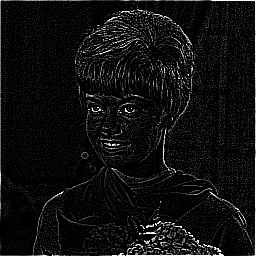

In [11]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Fungsi untuk menerapkan konvolusi 2D pada citra menggunakan kernel yang diberikan
def apply_convolution(image, kernel, langkah=1, padding=0):
    # Menambahkan padding (batas) nol di sekitar citra
    citra_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)

    # Mendapatkan ukuran citra dan kernel
    tinggi_citra, lebar_citra = citra_padded.shape
    tinggi_kernel, lebar_kernel = kernel.shape

    # Menghitung ukuran hasil setelah diterapkan konvolusi
    tinggi_output = (tinggi_citra - tinggi_kernel) // langkah + 1
    lebar_output = (lebar_citra - lebar_kernel) // langkah + 1
    hasil = np.zeros((tinggi_output, lebar_output))

    # Melakukan perhitungan konvolusi dengan menggeser kernel di seluruh citra
    for y in range(0, tinggi_output):
        for x in range(0, lebar_output):
            hasil[y, x] = np.sum(
                citra_padded[y*langkah:y*langkah+tinggi_kernel, x*langkah:x*langkah+lebar_kernel] * kernel
            )

    return hasil

# Bagian utama program
if __name__ == "__main__":
    # Membaca citra dari file (ubah dengan jalur file Anda)
    path_gambar = '/content/drive/MyDrive/PCVK/female.tiff'  # Sesuaikan dengan lokasi citra Anda
    gambar = cv2.imread(path_gambar)

    # Mengonversi citra menjadi hitam putih (grayscale)
    gambar_grayscale = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)

    # Kernel untuk berbagai filter:
    # Kernel untuk efek Emboss (memberi efek 3D pada tepi gambar)
    kernel_emboss = np.array([[-2, -1, 0],
                              [-1,  1, 1],
                              [ 0,  1, 2]])

    # Kernel untuk deteksi tepi dengan Sobel (deteksi tepi di sisi kiri)
    kernel_sobel = np.array([[1, 0, -1],
                             [2, 0, -2],
                             [1, 0, -1]])

    # Kernel Canny (untuk deteksi tepi yang lebih tajam)
    kernel_canny = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]])

    # Menentukan langkah dan padding untuk konvolusi
    langkah = 1
    padding = 1

    # Menerapkan konvolusi dengan masing-masing kernel
    hasil_emboss = apply_convolution(gambar_grayscale, kernel_emboss, langkah, padding)
    hasil_sobel = apply_convolution(gambar_grayscale, kernel_sobel, langkah, padding)
    hasil_canny = apply_convolution(gambar_grayscale, kernel_canny, langkah, padding)

    # Menampilkan hasil untuk setiap filter menggunakan fungsi cv2_imshow
    print("Hasil Filter Emboss:")
    cv2_imshow(hasil_emboss)

    print("Hasil Left Sobel Edge Detection:")
    cv2_imshow(hasil_sobel)

    print("Hasil Canny Edge Detection")
    cv2_imshow(hasil_canny)


Hasil Prewitt Edge Detection:


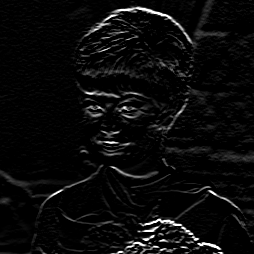

Hasil 5x5 Gaussian Blur :


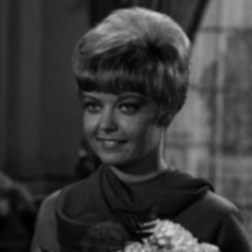

Hasil 21x21 Gaussian Blur :


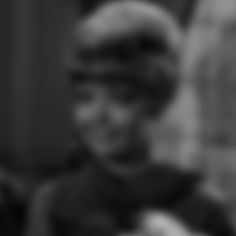

In [12]:


# Fungsi untuk menerapkan konvolusi pada citra
def apply_convolution(image, kernel, langkah=1, padding=0):
    # Tambahkan padding nol di sekitar citra
    citra_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)

    # Dapatkan ukuran citra dan kernel
    tinggi_citra, lebar_citra = citra_padded.shape
    tinggi_kernel, lebar_kernel = kernel.shape

    # Hitung ukuran keluaran setelah konvolusi
    tinggi_output = (tinggi_citra - tinggi_kernel) // langkah + 1
    lebar_output = (lebar_citra - lebar_kernel) // langkah + 1
    hasil = np.zeros((tinggi_output, lebar_output))

    # Lakukan operasi konvolusi
    for y in range(0, tinggi_output):
        for x in range(0, lebar_output):
            hasil[y, x] = np.sum(citra_padded[y*langkah:y*langkah+tinggi_kernel, x*langkah:x*langkah+lebar_kernel] * kernel)

    return hasil

# Bagian utama kode
if __name__ == "__main__":
    # Baca citra dari file (ganti path sesuai gambar Anda)
    path_gambar = '/content/drive/MyDrive/PCVK/female.tiff'
    gambar = cv2.imread(path_gambar)

    # Ubah citra ke grayscale
    gambar_grayscale = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)

    # Prewitt Edge Detection Kernel
    kernel_prewitt = np.array([[-1, -1, -1],
                               [ 0,  0,  0],
                               [ 1,  1,  1]])

    # Gaussian Blur 5x5 Kernel
    kernel_gaussian_5x5 = (1/256) * np.array([[1, 4, 6, 4, 1],
                                              [4, 16, 24, 16, 4],
                                              [6, 24, 36, 24, 6],
                                              [4, 16, 24, 16, 4],
                                              [1, 4, 6, 4, 1]])

    # Gaussian Blur 21x21 Kernel Generator
    def generate_gaussian_kernel(size, sigma):
        kernel_1d = cv2.getGaussianKernel(size, sigma)
        kernel_2d = np.outer(kernel_1d, kernel_1d.transpose())
        return kernel_2d

    # Generate Gaussian Kernel 21x21
    kernel_gaussian_21x21 = generate_gaussian_kernel(21, math.sqrt(21))

    # Terapkan konvolusi dengan berbagai kernel
    hasil_prewitt = apply_convolution(gambar_grayscale, kernel_prewitt)
    hasil_gaussian_5x5 = apply_convolution(gambar_grayscale, kernel_gaussian_5x5)
    hasil_gaussian_21x21 = apply_convolution(gambar_grayscale, kernel_gaussian_21x21)

    # Tampilkan hasil untuk Prewitt Edge Detection
    print("Hasil Prewitt Edge Detection:")
    cv2_imshow(hasil_prewitt)

    # Tampilkan hasil untuk Gaussian Blur 5x5
    print("Hasil 5x5 Gaussian Blur :")
    cv2_imshow(hasil_gaussian_5x5)

    # Tampilkan hasil untuk Gaussian Blur 21x21
    print("Hasil 21x21 Gaussian Blur :")
    cv2_imshow(hasil_gaussian_21x21)
